# iterative sampling refinement

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from scipy.interpolate import interp1d

In [125]:
def refine(x_coarse, y_coarse, fun):

    int_lin = interp1d(x_coarse, y_coarse, kind='linear')
    int_quad = interp1d(x_coarse, y_coarse, kind='quadratic')

    new_xy = []
    for xL, xR, yL in zip(x_coarse[:-1], x_coarse[1:], y_coarse[:-1]):
        new_xy.append( (xL, yL)  )
        
        x_middle = (xL+xR)/2

        y_linear = int_lin(x_middle)
        y_quad = int_quad(x_middle)

        error = np.abs(y_quad-y_linear)/np.ptp(y_coarse)
        if error > 0.0001:
            #print(error, )
            new_xy.append( (x_middle, fun(x_middle)) )
            

    new_xy.append( (x_coarse[-1], y_coarse[-1]) )

    return zip(*new_xy)

In [126]:
def gauss(x):
    return np.exp(-(x-0.2)**2/0.05)

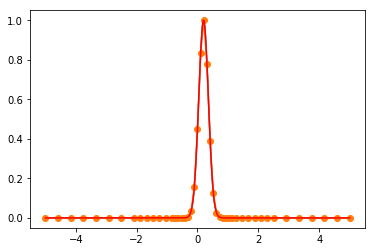

In [130]:
x_fine = np.linspace(-5, 5, 881)
y_fine = gauss(x_fine)

x_coarse = np.linspace(-5, 5, 7)
y_coarse = np.array([gauss(u) for u in x_coarse])

xn, yn = refine(x_coarse, y_coarse, gauss)
xn, yn = refine(xn, yn, gauss)
xn, yn = refine(xn, yn, gauss)
xn, yn = refine(xn, yn, gauss)

plt.plot(x_fine, y_fine);
plt.plot(xn, yn, 'o-');

plt.plot(x_fine, interp1d(xn, yn, kind='quadratic')(x_fine), 'r');



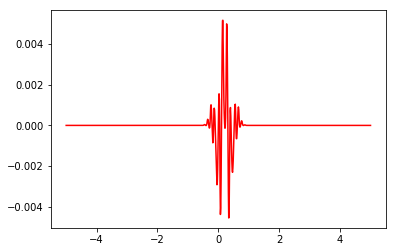

In [131]:
plt.plot(x_fine, y_fine-interp1d(xn, yn, kind='quadratic')(x_fine), 'r');